# Model Interpretation

**Imported Libraries**

In [2]:
import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn.inspection import plot_partial_dependence

from pdpbox.pdp import pdp_isolate, pdp_plot

import matplotlib.pyplot as plt

### partial dependence plots

**Wine dataset**

- Target: wine quality chnaged to binary value of good or bad. bad 0-4 good 5+

In [3]:
wine = pd.read_csv('data/winequality-red.csv')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
# Creating features list and target 
target = 'quality'
X = wine.drop(target, axis=1)

# Create target array
y = wine['quality']

# Map the target to binary class
y = y.apply(lambda x: 0 if x <= 5 else 1)

clf = DecisionTreeClassifier(random_state=42)

wine_model = clf.fit(X, y)


**Calculating partial dependance values**

- caluculate after model has been fit
- find feature importances and pick the top ones

the chart on the left shows that as alchole increases the quality increases.

the chart on the right does not show a strong relationship between chlorides and quality

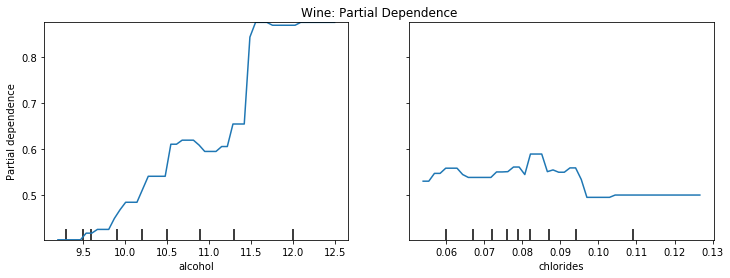

In [5]:
fig, ax = plt.subplots(1,1, figsize=(12,4))
plot_partial_dependence(wine_model, feature_names=X.columns, 
                        features=['alcohol','chlorides'], 
                        X=X, grid_resolution=50, ax=ax);

ax.set_title('Wine: Partial Dependence')

plt.show()

Now, we're going to use a different library to visualize the partial dependence for one feature. This plot is calculating the same dependence of the feature but is plotting all of the predictions (shaded area) as well as the average (solid line).

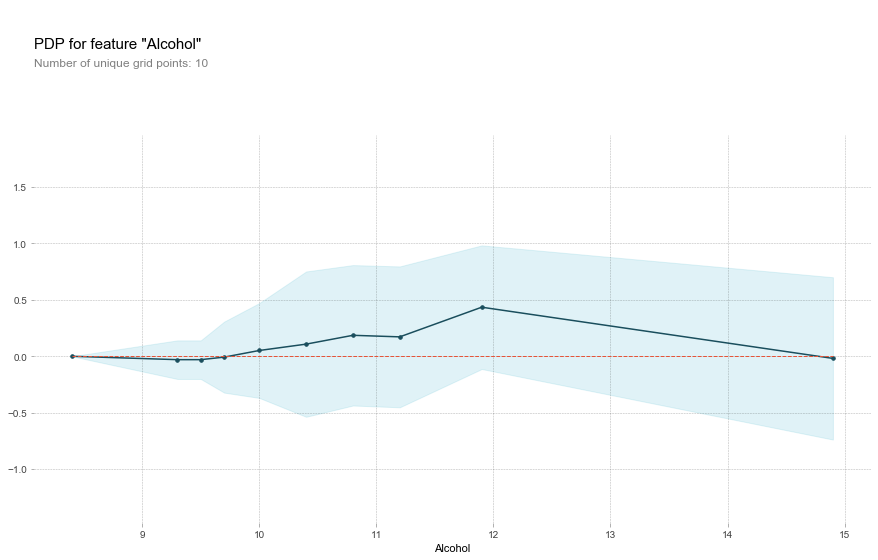

In [6]:
# Create the plot for a single feature isolated

isolated = pdp_isolate(
    model= wine_model,
    dataset=X,
    model_features=X.columns,
    feature='alcohol'
)

pdp_plot(isolated, feature_name='Alcohol');

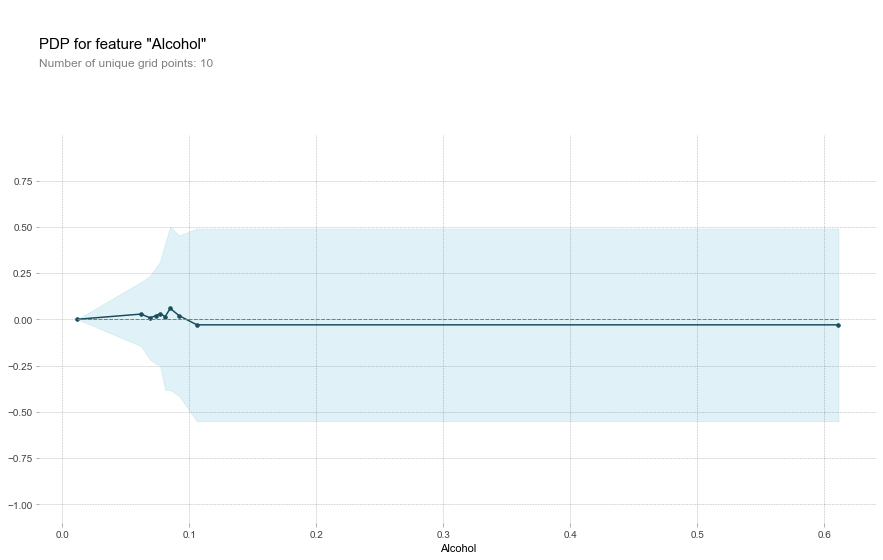

In [7]:
# Create the plot for a single feature isolated

isolated = pdp_isolate(
    model= wine_model,
    dataset=X,
    model_features=X.columns,
    feature='chlorides'
)

pdp_plot(isolated, feature_name='Alcohol');

in the above two plots we see the partial depenence re-visualized this time with all the data showing a range and the mean as the center solid line

### SHapley Additive exPlanations plots

- The TreeExplainer() is used to explain the output of ensemble tree models. From the explainer values, we calculate the Shapley values and then visualize the results for a single observation (instance).

In [8]:
wine = pd.read_csv('data/winequality-red.csv')

# Set the features list and target variable 
target = 'quality'
X = wine.drop(target, axis=1)

# Create the target array
y = wine['quality']

# Map the target to a binary class at quality = 5
y = y.apply(lambda x: 0 if x <= 5 else 1)

In [12]:
# Import shap
import shap

# Instantiate and fit the model
xgb = XGBClassifier(random_state=42)
wine_model = xgb.fit(X, y)
mybooster = wine_model.get_booster()

# Shap explainer initilization
shap_ex = shap.TreeExplainer(mybooster)

[10:57:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [25]:
# Calculate the shapley values
shap_values = shap_ex.shap_values(X)

# Initialize the plot
shap.initjs()

# Plot the values for the 25th row of the DataFrame
shap.force_plot(shap_ex.expected_value, shap_values[25,:], X.iloc[25,:])